# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

## show the info of data.frame
data.info()

age   workclass education_level  education-num  marital-status  \
0   39   State-gov       Bachelors           13.0   Never-married   

      occupation    relationship    race    sex  capital-gain  capital-loss  \
0   Adm-clerical   Not-in-family   White   Male        2174.0           0.0   

   hours-per-week  native-country income  
0            40.0   United-States  <=50K

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [2]:
data.describe(include='all')

age workclass education_level  education-num  \
count   45222.000000     45222           45222   45222.000000   
unique           NaN         7              16            NaN   
top              NaN   Private         HS-grad            NaN   
freq             NaN     33307           14783            NaN   
mean       38.547941       NaN             NaN      10.118460   
std        13.217870       NaN             NaN       2.552881   
min        17.000000       NaN             NaN       1.000000   
25%        28.000000       NaN             NaN       9.000000   
50%        37.000000       NaN             NaN      10.000000   
75%        47.000000       NaN             NaN      13.000000   
max        90.000000       NaN             NaN      16.000000   

             marital-status     occupation relationship    race    sex  \
count                 45222          45222        45222   45222  45222   
unique                    7             14            6       5      2   
top      Married-civ-spouse   Craft-repair      Husband   White   Male   
freq                  21055           6020        18666   38903  30527   
mean                    NaN            NaN          NaN     NaN    NaN   
std                     NaN            NaN          NaN     NaN    NaN   
min                     NaN            NaN          NaN     NaN    NaN   
25%                     NaN            NaN          NaN     NaN    NaN   
50%                     NaN            NaN          NaN     NaN    NaN   
75%                     NaN            NaN          NaN     NaN    NaN   
max                     NaN            NaN          NaN     NaN    NaN   

        capital-gain  capital-loss  hours-per-week  native-country income  
count   45222.000000  45222.000000    45222.000000           45222  45222  
unique           NaN           NaN             NaN              41      2  
top              NaN           NaN             NaN   United-States  <=50K  
freq             NaN           NaN             NaN           41292  34014  
mean     1101.430344     88.595418       40.938017             NaN    NaN  
std      7506.430084    404.956092       12.007508             NaN    NaN  
min         0.000000      0.000000        1.000000             NaN    NaN  
25%         0.000000      0.000000       40.000000             NaN    NaN  
50%         0.000000      0.000000       40.000000             NaN    NaN  
75%         0.000000      0.000000       45.000000             NaN    NaN  
max     99999.000000   4356.000000       99.000000             NaN    NaN

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [3]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
income_level = data['income'].unique()  # ['<=50K' '>50K']
n_greater_50k = sum(data['income'] == income_level[1]) # we can also use: data['income'].value_counts()

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = sum(data['income'] == income_level[0])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k * 100.0 / (n_greater_50k + n_at_most_50k)

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

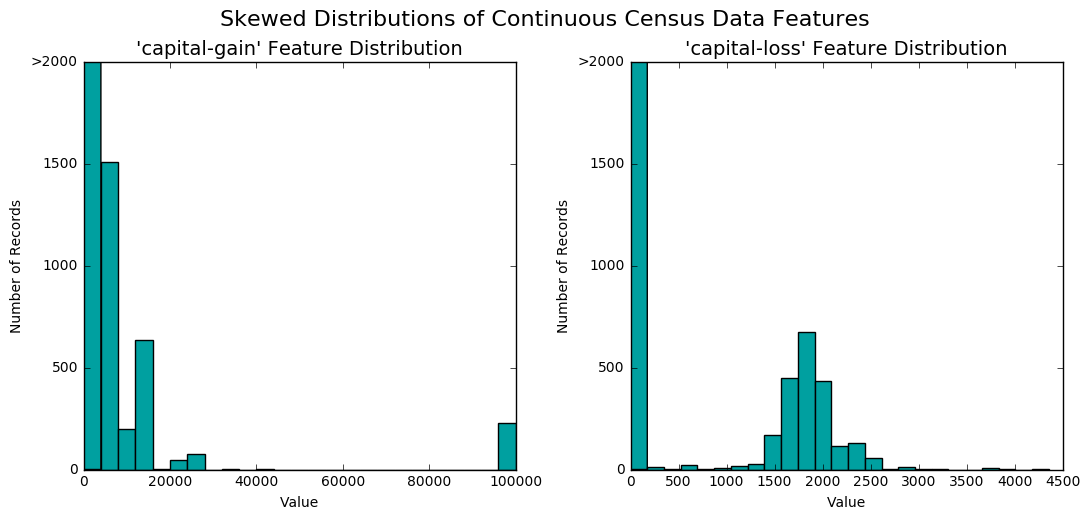

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

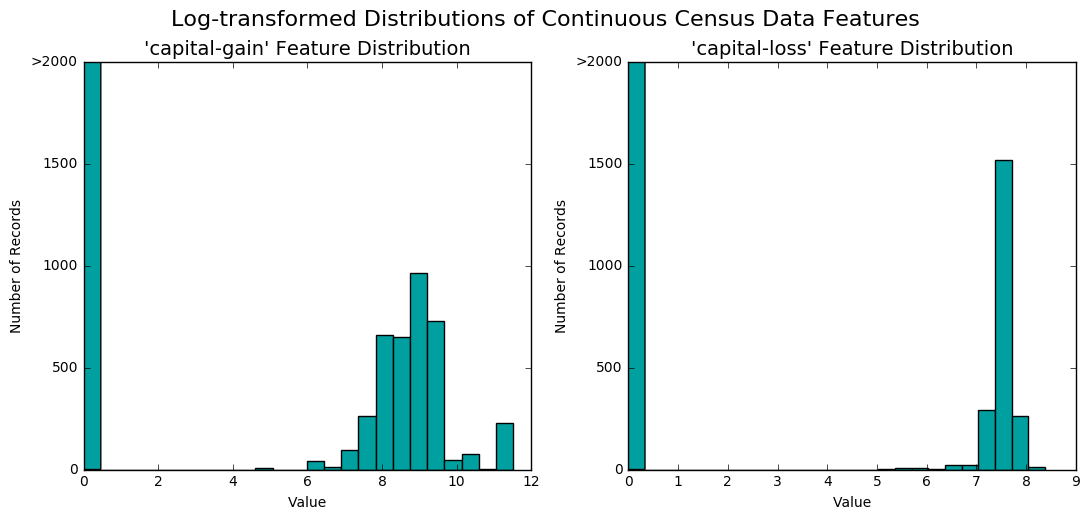

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 3))

# we can normalize the features by hand:
# t = data[numerical]
# t[numerical].apply(lambda x: (x-x.min())*1.0/(x.max()-x.min()))

age          workclass education_level  education-num  \
0  0.301370          State-gov       Bachelors       0.800000   
1  0.452055   Self-emp-not-inc       Bachelors       0.800000   
2  0.287671            Private         HS-grad       0.533333   

        marital-status          occupation    relationship    race    sex  \
0        Never-married        Adm-clerical   Not-in-family   White   Male   
1   Married-civ-spouse     Exec-managerial         Husband   White   Male   
2             Divorced   Handlers-cleaners   Not-in-family   White   Male   

   capital-gain  capital-loss  hours-per-week  native-country  
0       0.02174           0.0        0.397959   United-States  
1       0.00000           0.0        0.122449   United-States  
2       0.00000           0.0        0.397959   United-States

### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [7]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()

## note although the default prefix is None, if variable name is used as prefix if there are more than 2 variabels
features = pd.get_dummies(features_raw, prefix = None) 

# TODO: Encode the 'income_raw' data to numerical values
## both work
# income = (income_raw == '>50K').apply(lambda x: int(x))
income = income_raw.apply(lambda x: 0 if x=='<=50K' else 1)


# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
# print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [8]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *UdacityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *UdacityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *UdacityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [9]:
# TODO: Calculate accuracy
accuracy = income.sum() *1.0 / income.shape[0]

# TODO: Calculate F-score using the formula above for beta = 0.5
precision = accuracy
recall = 1
beta = 0.5
fscore = (1+pow(beta,2))*precision*recall*1.0 / (pow(beta,2)*precision + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supverised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer: **
I choose Logistic Regression, Decision Tree, Gradient Boosting.

- Logistic regression. 
    - Logistic regression is widely in predicting binary dependent variables, for example fraud detection. 
    - The model implements fast, and is easy to interpret. It's a linear model, so it performs well when the data is linear separable. Also, it's very easy to add a regularization term (L1 and L2) on the cost function. through tuning the parameters, it can generally achieve a better result.
    - When the data isn't linear separable (decision space is complex), then it doesn't perform as good as other models like GBM. Also, it has higher bias.
    - For a binary predicting problem, usually we can fit a logistic regression as a benchmark. It's fast and performs pretty good. Also, it doesn't need the assumptions including normality assumption which required by linear regression, so it is appropriate for this dataset (We showed before two features are skewed, didn't hold normality assumption).
- Decision tree.
    - Decision tree is used widely in multiple areas. For example, in marketing we use decision tree to classify customers into binary groups using features of customers.
    - It's very easy to understand even for the people without machine learning/statistics background, and easy to interpret. The training time is very short. It performs good when the data is non-linear seperable. 
    - The weaknesses is that decision tree has higher variance and lower bias, so it's easy to overfit on training set and doesn't generalize well on test set. One way to reduce overfitting is pruning.
    - For a binary predicting problem, we can always try decision tree as there is no assumption required by ths model. However, usually it doesn't perform as good as other tree based models like random forest and Gradient boosting.
- Gradient Boosting
    - Widely used in many predicting problems, including machine learning competitions.
    - This is one of the most powerful predicting models, which perform well in many different cases. As a tree based model (including random forest), it reduces the variance by training a large number of trees, while each single tree has lowe biase. Therefore, GBM and random forest could have lower bias and lower variance. 
    - The weaknesses could be long training time, and cumbersome parameter tuning. GBM couldn't handle the high-cardinality categorical variables well, as it either runs slow or overfits the feature.
    - GBM performs quite good for a predicting problem if the parameters are fine-tuned. 
    

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train.iloc[0:sample_size], y_train.iloc[0:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test.iloc[0:300])
    predictions_train = learner.predict(X_train.iloc[0:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train.iloc[0:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test.iloc[0:300], predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    beta = 0.5
    results['f_train'] = fbeta_score(y_train.iloc[:300], predictions_train, beta)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test.iloc[:300], predictions_test, beta)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Dependent on which algorithms you chose, the following implementation may take some time to run!

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


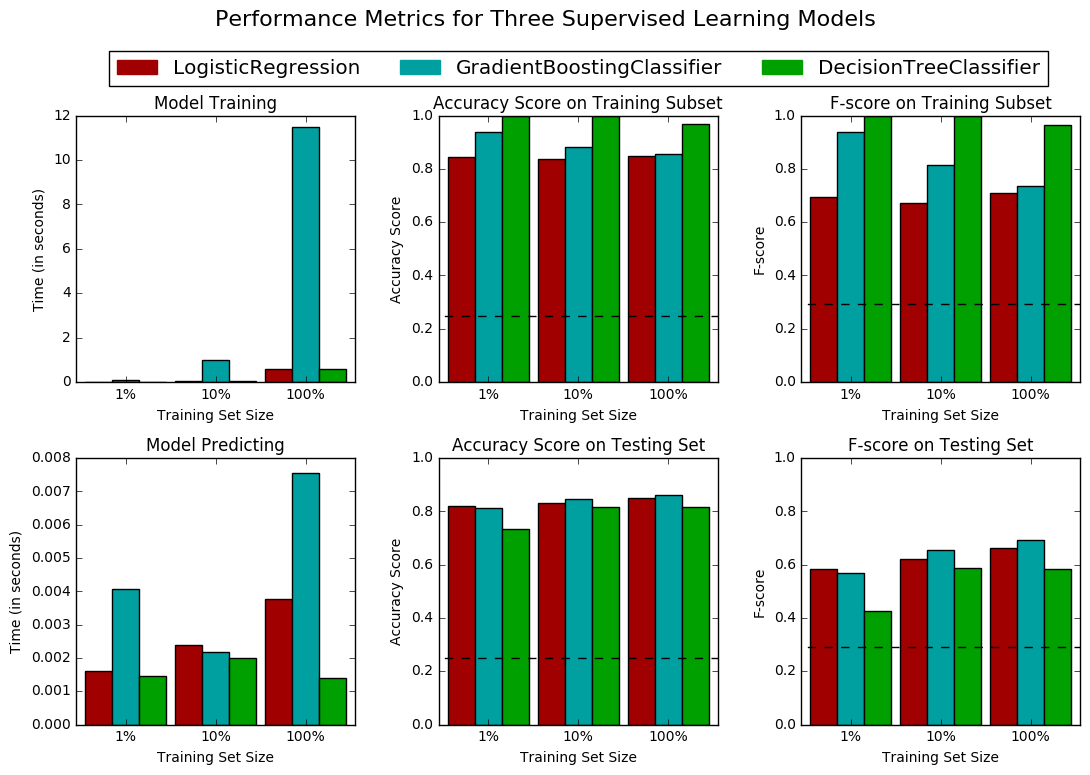

In [12]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=10)
clf_B = DecisionTreeClassifier(random_state=10)
clf_C = GradientBoostingClassifier(random_state=10)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: **

The Gradient Boosting Machine outperform the other two models. For both Accuracy and F-score, GBM outforms logistic regression and decision tree. However, the training time of GBM is much more than other two models. But for this amount of dataset, we still prefer GBM as the training time is acceptable. We didn't consider prediction time as it's much less than training time.

The GBM model is suitable for this binary predicting problem. GBM can handle both continuous and categorical features.

### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** 

First we should know what is decision tree. For this dataset, we want to come up with a model with which we can predict the response (income >= 50 or not) using the information of the donors. Suppose at the begining we have a node (stump), each time we split the node into two parts and get two new nodes. When spliting the node, we choose one feature that can make the response variable on two subnodes are as pure as possible. Then we recursively split each node untill all the nodes are pure(or the purity meet the requirement).

Gradient boosting classifier is a tree based model (actually GBM can be generalized to many machine learning classifiers, but here we just restrict it to decision tree), which contains a group of sequential trees. After the first tree, each tree is fitted on the residuals (error) of the previous tree, which mean for each one more tree, we can reduce the error on the training set. If we tune the parameters well, we could also get a low error on test set. That's how GBM is based on decision tree and do better than it.  

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [14]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import cross_validation

# TODO: Initialize the classifier
clf = GradientBoostingClassifier()

# TODO: Create the parameters list you wish to tune
parameters = {'max_depth':[8, 9, 10]}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring = scorer) # default cv=3

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8687
Final F-score on the testing data: 0.7464


In [15]:
best_clf

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=8, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### _Additional Question 4: Model Tuning (Continue)_

The model I choose here is GBM. To achive the optimum, it's necessary to tune different paraments of GBM. As the grid search for multiple parameters is computational expensive, I tuned the parameters sequentially (tune some parameters while keeping others fixed) See [here](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/) for a reference.

__Step 1: fixed learning rate, tune n_estimator__

In [308]:
#### Step 1: fixed learning rate, tune n_estimator

param_test1 = {'n_estimators': range(150,181,10)}
clf = GradientBoostingClassifier(learning_rate = 0.1,
                                 min_samples_split = 200,
                                 min_samples_leaf = 30,
                                 max_depth = 10,
                                 max_features = 'sqrt',
                                 subsample = 0.8,
                                 random_state = 10
                                 )
grid_seach_1 = GridSearchCV(clf, param_test1, scoring = make_scorer(fbeta_score, beta=0.5), n_jobs=4, cv=3)
grid_seach_1.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=10, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=30, min_samples_split=200,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_estimators': [150, 160, 170, 180]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(fbeta_score, beta=0.5), verbose=0)

In [319]:
print(grid_seach_1.best_params_)
grid_seach_1.grid_scores_

{'n_estimators': 160}


[mean: 0.74780, std: 0.00424, params: {'n_estimators': 150},
 mean: 0.74870, std: 0.00324, params: {'n_estimators': 160},
 mean: 0.74768, std: 0.00269, params: {'n_estimators': 170},
 mean: 0.74842, std: 0.00265, params: {'n_estimators': 180}]

__Step 2: tune tree-based parameters: max_depth and min_samples_split__

In [321]:
#### Step 2: tune tree-based parameters: max_depth and min_samples_split
param_test2 = {'max_depth':range(9,12,1), 'min_samples_split':range(100,500,100)}
clf = GradientBoostingClassifier(learning_rate = 0.1,
                                 n_estimators = 160,
                                 min_samples_leaf = 30,
                                 max_features = 'sqrt',
                                 subsample = 0.8,
                                 random_state = 10
                                 )
grid_seach_2 = GridSearchCV(clf, param_test2, scoring = make_scorer(fbeta_score, beta=0.5), n_jobs=4, cv=3)
grid_seach_2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=30, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'min_samples_split': [100, 200, 300, 400], 'max_depth': [9, 10, 11]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(fbeta_score, beta=0.5), verbose=0)

In [322]:
print(grid_seach_2.best_params_)
grid_seach_2.grid_scores_

{'min_samples_split': 300, 'max_depth': 10}


[mean: 0.74672, std: 0.00584, params: {'min_samples_split': 100, 'max_depth': 9},
 mean: 0.74693, std: 0.00358, params: {'min_samples_split': 200, 'max_depth': 9},
 mean: 0.74593, std: 0.00152, params: {'min_samples_split': 300, 'max_depth': 9},
 mean: 0.74579, std: 0.00250, params: {'min_samples_split': 400, 'max_depth': 9},
 mean: 0.74900, std: 0.00499, params: {'min_samples_split': 100, 'max_depth': 10},
 mean: 0.74870, std: 0.00324, params: {'min_samples_split': 200, 'max_depth': 10},
 mean: 0.75027, std: 0.00423, params: {'min_samples_split': 300, 'max_depth': 10},
 mean: 0.74739, std: 0.00482, params: {'min_samples_split': 400, 'max_depth': 10},
 mean: 0.74781, std: 0.00560, params: {'min_samples_split': 100, 'max_depth': 11},
 mean: 0.74632, std: 0.00415, params: {'min_samples_split': 200, 'max_depth': 11},
 mean: 0.74584, std: 0.00426, params: {'min_samples_split': 300, 'max_depth': 11},
 mean: 0.74656, std: 0.00341, params: {'min_samples_split': 400, 'max_depth': 11}]

__Step 3: tune tree-based parameters: min_samples_leaf__

In [325]:
#### Step 3: tune tree-based parameters: min_samples_leaf
param_test3 = {'min_samples_leaf':range(20,60,10)}
clf = GradientBoostingClassifier(learning_rate = 0.1,
                                 n_estimators = 160,
                                 min_samples_split = 300,
                                 max_depth = 10,
                                 max_features = 'sqrt',
                                 subsample = 0.8,
                                 random_state = 10
                                 )
grid_seach_3 = GridSearchCV(clf, param_test3, scoring = make_scorer(fbeta_score, beta=0.5), n_jobs=4, cv=3)
grid_seach_3.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=10, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'min_samples_leaf': [20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(fbeta_score, beta=0.5), verbose=0)

In [327]:
print(grid_seach_3.best_params_)
grid_seach_3.grid_scores_

{'min_samples_leaf': 30}


[mean: 0.74722, std: 0.00396, params: {'min_samples_leaf': 20},
 mean: 0.75027, std: 0.00423, params: {'min_samples_leaf': 30},
 mean: 0.74787, std: 0.00487, params: {'min_samples_leaf': 40},
 mean: 0.74515, std: 0.00146, params: {'min_samples_leaf': 50}]

__Step 4: tune tree-based parameters: max_features__

In [345]:
#### Step 4: tune tree-based parameters: max_features
# note there are 103 column, default sqrt is around 10.
param_test4 = {'max_features':range(9,13,1)}
clf = GradientBoostingClassifier(learning_rate = 0.1,
                                 n_estimators = 160,
                                 min_samples_split = 300,
                                 min_samples_leaf = 30,
                                 max_depth = 10,
                                 subsample = 0.8,
                                 random_state = 10)
grid_seach_4 = GridSearchCV(clf, param_test4, scoring = make_scorer(fbeta_score, beta=0.5), n_jobs=4, cv=3)
grid_seach_4.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=10, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=30, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_features': [9, 10, 11, 12]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(fbeta_score, beta=0.5), verbose=0)

In [348]:
print(grid_seach_4.best_params_)
grid_seach_4.grid_scores_

{'max_features': 10}


[mean: 0.74754, std: 0.00368, params: {'max_features': 9},
 mean: 0.75027, std: 0.00423, params: {'max_features': 10},
 mean: 0.74901, std: 0.00338, params: {'max_features': 11},
 mean: 0.74635, std: 0.00397, params: {'max_features': 12}]

__Step 5: tune subsample__

In [360]:
#### Step 5: tune subsample
param_test5 = {'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]}
clf = GradientBoostingClassifier(learning_rate = 0.1,
                                 n_estimators = 160,
                                 min_samples_split = 300,
                                 min_samples_leaf = 30,
                                 max_depth = 10,
                                 max_features = 'sqrt',
                                 random_state = 10)
grid_seach_5 = GridSearchCV(clf, param_test5, scoring = make_scorer(fbeta_score, beta=0.5), n_jobs=4, cv=3)
grid_seach_5.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=10, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=30, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(fbeta_score, beta=0.5), verbose=0)

In [361]:
print(grid_seach_5.best_params_)
grid_seach_5.grid_scores_

{'subsample': 0.8}


[mean: 0.74573, std: 0.00127, params: {'subsample': 0.6},
 mean: 0.74776, std: 0.00624, params: {'subsample': 0.7},
 mean: 0.74737, std: 0.00310, params: {'subsample': 0.75},
 mean: 0.75027, std: 0.00423, params: {'subsample': 0.8},
 mean: 0.74746, std: 0.00498, params: {'subsample': 0.85},
 mean: 0.74920, std: 0.00548, params: {'subsample': 0.9}]

__Step 6: decrease learning rate, increase number of trees__

In [391]:
#### Step 6: decrease learning rate, increase number of trees
clf_final = GradientBoostingClassifier(learning_rate = 0.05,
                                 n_estimators = 320,
                                 min_samples_split = 300,
                                 min_samples_leaf = 30,
                                 max_depth = 10,
                                 max_features = 'sqrt',
                                 subsample = 0.8,
                                 random_state = 10)

# define a function to fit the model show feature importance.
from sklearn import cross_validation
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

def modelfit(clf, X, y, performCV=True, printFeatureImp = False, cv_folds=3):
    clf.fit(X, y)
    pred = clf.predict(X)
    f_score = fbeta_score(y, pred, beta = 0.5)
    
    # perform cross validation
    if performCV:
        cv_score = cross_validation.cross_val_score(clf, X, y, scoring=make_scorer(fbeta_score, beta=0.5), 
                                                    cv=cv_folds, n_jobs=4)
    print "\nModel Report"
    print "F beta score(train): {:.7f}".format(f_score)
    print "CV F beta score: Mean - {:.7f} | Std - {:.7f} | Min - {:.7f} | Max - {:.7f}".format(np.mean(cv_score), np.std(cv_score),
                                                                                   np.min(cv_score), np.max(cv_score))
    # show feature importance
    if printFeatureImp:
        featureImp = pd.Series(clf.feature_importances_, list(X.columns)).sort_values(ascending=False)
        featureImp.plot(kind='bar', title = 'Feature Importance')
        plt.ylabel('Feature Importance Score')

modelfit(clf_final, X_train, y_train)


Model Report
F beta score(train): 0.7755930
CV F beta score: Mean - 0.7477218 | Std - 0.0046109 | Min - 0.7420614 | Max - 0.7533556


Here I checked the performance of re-tunned model on test set.

In [17]:
clf_final = GradientBoostingClassifier(learning_rate = 0.05,
                                 n_estimators = 320,
                                 min_samples_split = 300,
                                 min_samples_leaf = 30,
                                 max_depth = 10,
                                 max_features = 'sqrt',
                                 subsample = 0.8,
                                 random_state = 10)
clf_final.fit(X_train, y_train)
clf_final_pred = clf_final.predict(X_test)

print "\nFinal Optimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, clf_final_pred))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, clf_final_pred, beta = 0.5))


Final Optimized Model
------
Final accuracy score on the testing data: 0.8703
Final F-score on the testing data: 0.7507


### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.2478               |     0.8630              |    0.8703             |
| F-score        |      0.2917               |     0.7395              |   0.7507       |


**Answer: **

The optimized model is better than unoptimized model and naive predictor in both Accuracy and F-score. As in naive predictor all the records are predicted as positive, so the naive predictor benchmarks are very low. 

Here I selected GBM as the final model and tuned its parameters. The tuning of GBM is more difficult than some other simpler models like logistic regression, KNN, etc. The final result could be better if you tuned the parameters at a higher granularity.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them?_

In [21]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

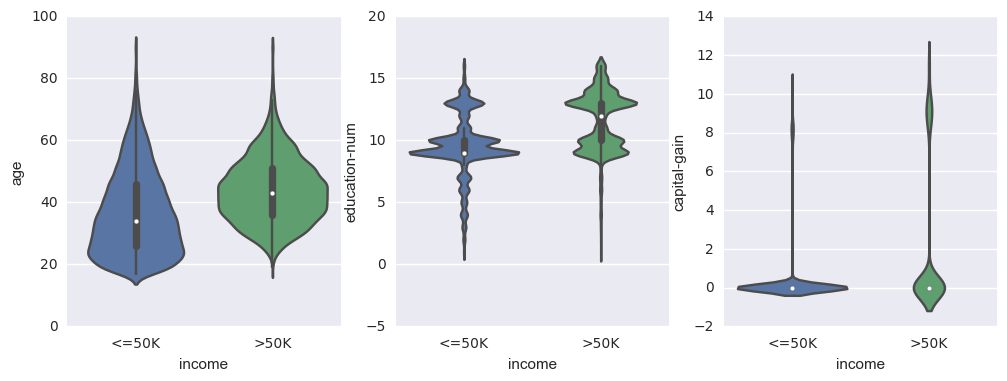

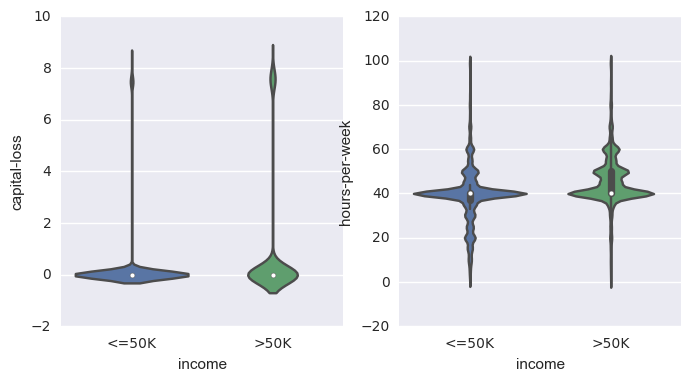

In [121]:
data_plot = pd.concat([features_raw, income_raw], axis=1)
cats = [col for col in data_plot.columns if data_plot[col].dtype == 'object']
cons = [n for n in data_plot.columns if n not in cats]

for i in [c for c in cats if c != 'income']: # avoid plotting 'income' vs. 'income'
    data_plot[i] = pd.factorize(data_plot[i], sort=True)[0]

# plot continuous variables vs. response 
# plot first row
fg, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for j in range(3):
        sns.violinplot(x = 'income', y= cons[j], data=data_plot, ax=ax[j])

# plot second row
fg, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
for j in range(2):
        sns.violinplot(x = 'income', y= cons[3+j], data=data_plot, ax=ax[j])

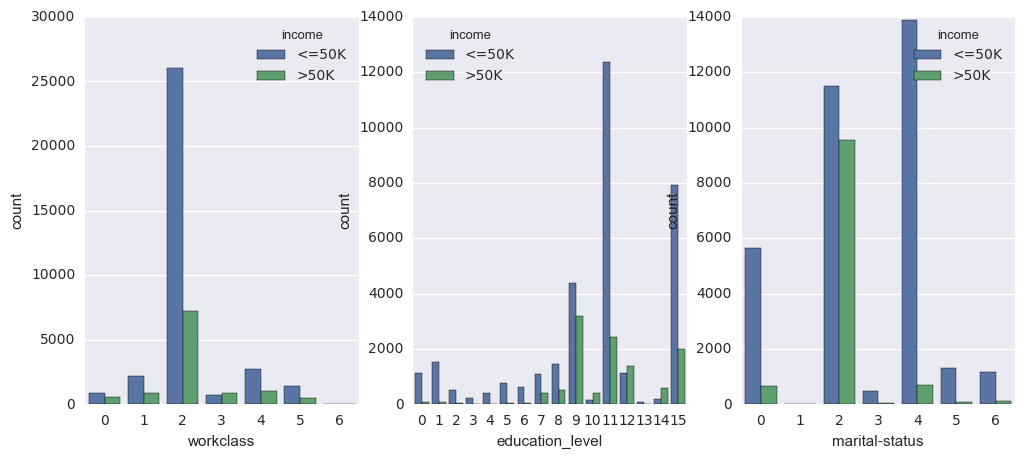

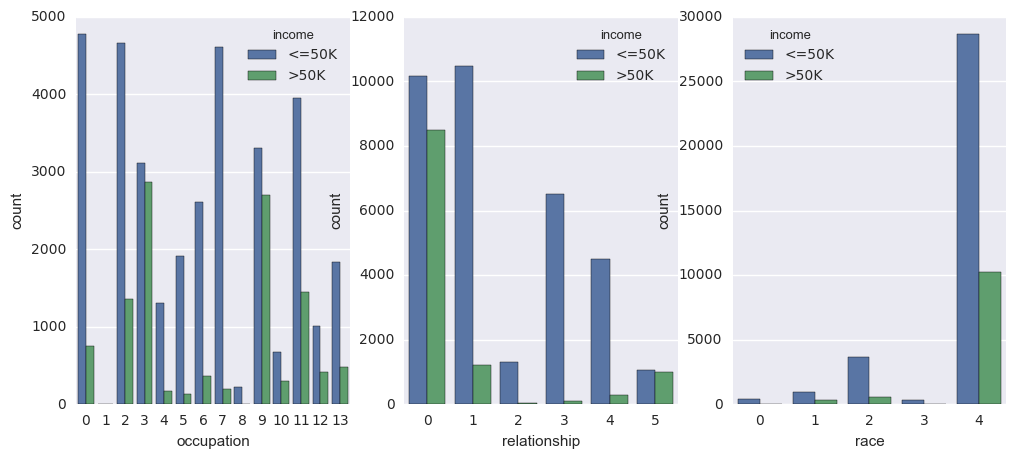

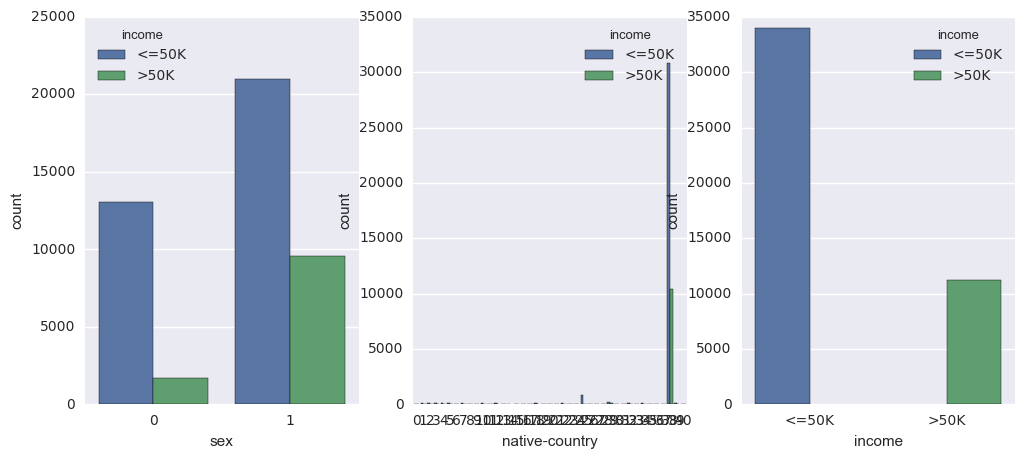

In [115]:
# plot categorical variables vs. response
nrows = ncols =3
for i in range(nrows):
    fg, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
    for j in range(ncols):
        sns.countplot(x= cats[i*ncols+j], hue='income', data=data_plot, ax=ax[j])

**Answer:**

I did simple exploratory data analysis here. From the violinplot of continuus variable vs. response and barplot of categorical variable vs. response, we could see 
- All the continuous variables `age`, `education-num`, `capital-gain`, `capital-loss` and `hours-per-week` seem to be significant to `income`. 
- For the categorical variables, some levels of `martial-status` and `occupation` seem to be significant.
- I think the top five most important variables should be `age`, `education-num`, `capital-gain`, `capital-loss` and `hours-per-week`.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

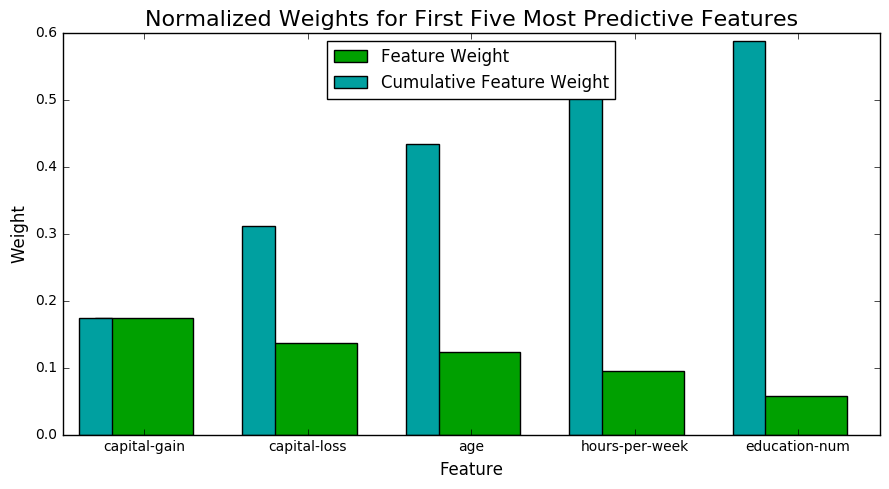

In [19]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Train the supervised model on the training set 
# clf_final = GradientBoostingClassifier(learning_rate = 0.05,
#                                  n_estimators = 320,
#                                  min_samples_split = 300,
#                                  min_samples_leaf = 30,
#                                  max_depth = 10,
#                                  max_features = 'sqrt',
#                                  subsample = 0.8,
#                                  random_state = 10)
model = clf_final

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

Plot the feature importance of the top 10 vairables.

Cumulative weight of top 5 features: 0.5871
Cumulative weight of top 10 features: 0.6810


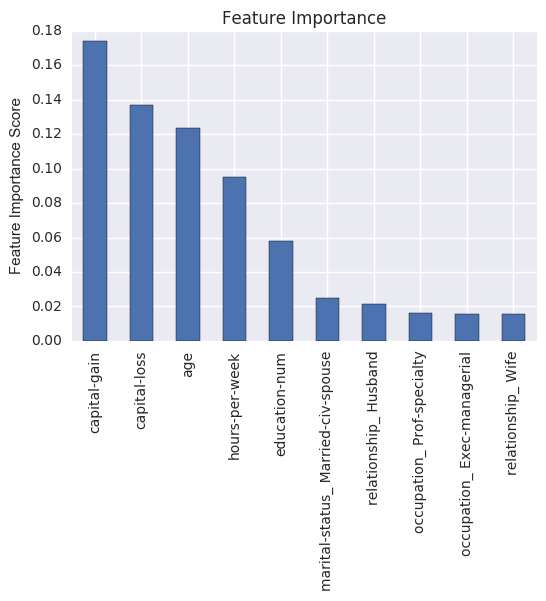

In [22]:
featureImp = pd.Series(model.feature_importances_, list(X_train.columns)).sort_values(ascending=False).iloc[0:10]
featureImp.plot(kind='bar', title = 'Feature Importance')
plt.ylabel('Feature Importance Score')
print 'Cumulative weight of top 5 features: {:.4f}'.format(featureImp.iloc[0:5].sum())
print 'Cumulative weight of top 10 features: {:.4f}'.format(featureImp.iloc[0:10].sum())

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**

The feature importance extracted from GBM model is consistent with the exploratory analysis, but the rank is slightly different.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [139]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(clf_final)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

best_predictions = clf_final_pred

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8703
F-score on testing data: 0.7507

Final Model trained on reduced data
------
Accuracy on testing data: 0.8385
F-score on testing data: 0.6866


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**

The result of model trained on reduced data is quite good. Compare with the model with full data, the accuracy captured 96.3% of the full model while F-score captured 91.5%. The reduced data is pretty good if taking into account training time.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.